In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

## Podstawowy sposób reprezentacji tekstu to macierz wystąpień słów w dokumentach - oznacza to bardzo duży wymiar danych... 

In [4]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

Wykonujemy reprezentację danych

In [5]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
dtm = cv.fit_transform(documents) 
# print(dtm )

print(cv.get_feature_names())

x = dtm.todense()
print(x)

['kot', 'krowa', 'morze', 'papuga', 'piasek', 'pies', 'plaża', 'słońce', 'woda']
[[0 0 1 0 1 0 1 1 1]
 [0 0 1 0 1 0 1 0 1]
 [0 0 1 0 0 0 1 1 0]
 [0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 0 1]
 [0 1 0 1 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0]]


Chcemy, żeby wiersze reprezentowały kolejne słowa, a kolumny kolejne dokumenty

In [6]:
x = dtm.todense().T
x # wiersze słowa, kolumny - dokumenty

matrix([[0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

### Nasz cel - wyreprezentować dokumenty w niżej wymiarowej przestrzeni - znaleźć ich znaczenie.

In [7]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x).astype("float")
np.fill_diagonal(S,s)

Sprawdzamy, czy można wrucić.

In [8]:
np.round(np.dot(np.dot(U,S),V), 1)

array([[-0., -0., -0.,  0.,  0.,  0., -0.,  1.],
       [ 0., -0., -0.,  0.,  0.,  0.,  1., -0.],
       [ 1.,  1.,  1., -0., -0., -0.,  0., -0.],
       [ 0.,  0., -0., -0.,  0.,  0.,  1., -0.],
       [ 1.,  1., -0.,  1., -0.,  1., -0., -0.],
       [-0., -0.,  0., -0.,  0.,  0.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1., -0.,  0.,  0.],
       [ 1., -0.,  1., -0.,  1., -0.,  0.,  0.],
       [ 1.,  1., -0.,  1.,  1.,  1.,  0., -0.]])

# Ile wziac skladowych?

In [9]:
np.round(S , 1)

array([[3.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1.9, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.7, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

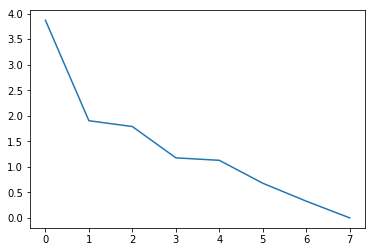

In [10]:
plt.plot(s)
plt.show()

Jedna kolumna macierzy V reprezentuje jeden dokument (w mniejszej przestrzeni) 
zatem bierzemy pierwsze k współrzędnych z każdego dokumentu

In [11]:
k = 3
np.set_printoptions(2,suppress=True)

x_n = V[:k,:] # - jedna kolumna reprezentuje jeden dokument (w mniejszej przestrzeni) 
#                 zatem bierzemy pierwsze k współrzędnych z każdego dokumentu
x_n

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [-0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.85, -0.53],
        [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53,  0.  ,  0.  ]])

Spojrzmy na wyglad dokumentow w powyzszej przestrzeni cech ukrytych

### Pytanie: jak wyreprezentować przychodzące zapytanie w naszej przestrzeni V?

Spójrzmy jak otrzymać V z X mając rozkład svd:

$ X = USV \ \ $ => $ \ \ U^{-1} X = SV^t \ \ $ => $ \ \ S^{-1} U^{-1} X = V^t$ 

i wiemy, że $U^{-1} = U^t$.

Zatem co zrobić z nowym zapytanie, żeby otrzymać jego reprezentację w V? To samo co z X, czyli:

$ V^t_{nowe} = S^{-1} U^t X_{nowy}$

In [12]:
#Zatem, aby otrzymać k-wymiarową reprezentację V z X:
dk = np.dot(np.linalg.inv(S[:k,:k]), np.dot(U.T[:k,:],x))
dk

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [-0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.85, -0.53],
        [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53,  0.  ,  0.  ]])

# Zad

Rozważmy nowe słowo i znajdżmy jego:

 * reprezentację w postaci liczby wystąpień
 * w przestrzeni o zredukowanym wymiarze

In [21]:
zapytanie = ["morze i słońce"]
zapytanie = cv.transform(zapytanie).todense().T # reprezentujemy zapytanie jak wektor wystapień słów
zapytanie

matrix([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]], dtype=int64)

In [22]:
#Zatem reprezentacja zapytania w przestrzeni dokumentów:
q = np.dot(np.linalg.inv(S[:k,:k]), np.dot(U.T[:k,:],zapytanie))
q

matrix([[-0.17],
        [-0.  ],
        [-0.52]])

# Zad
Teraz naszym zadaniem będzie posortowanie wszystki zdań od najbliższego do naszj frazy "morze i słońce" do najdalszego.

In [24]:
dk

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [-0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.85, -0.53],
        [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53,  0.  ,  0.  ]])

In [25]:
q

matrix([[-0.17],
        [-0.  ],
        [-0.52]])

In [26]:
from sklearn.metrics import pairwise_distances
pairwise_distances(dk.T,q.T)

array([[0.55],
       [0.78],
       [0.21],
       [0.93],
       [0.33],
       [1.06],
       [1.01],
       [0.76]])

In [27]:
kolejnosc = pairwise_distances(dk.T,q.T).flatten().argsort()
kolejnosc

array([2, 4, 0, 7, 1, 3, 6, 5], dtype=int64)

In [28]:
np.array(documents)[kolejnosc]

array(['morze plaża słońce', 'słońce woda plaża',
       'morze plaża woda słońce piasek', 'pies kot',
       'morze plaża piasek woda', 'plaża woda piasek',
       'krowa pies papuga', 'piasek woda'], dtype='<U30')